In [1]:
from math import sqrt, ceil
from numpy import linspace,cos,pi,ceil,floor,arange
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np

#from stack overflow
def is_prime(n):
    if n == 2:
        return True
    if n % 2 == 0 or n <= 1:
        return False

    sqr = int(sqrt(n)) + 1

    for d in range(3, sqr, 2):
        if n % d == 0:
            return False
        
    return True

def fft_(data, rfft_use = False):
    print("fft")
    N = len(data)
    y = data
    
    # efficiency check
    if is_prime(N):
        data.append(0)
    
    if rfft_use:
        Y_k_pos = np.abs(np.fft.rfft(y))/N
    else:
        # has real negative imagin -> squash to only quad 1
        Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT + norm
        Y_k[1:] = 2*Y_k[1:] # single-sided spectrum only
        Y_k_pos = np.abs(Y_k) # only real part
    
    return Y_k_pos

def fft_filter(data, threshold_pre = 99):
    dataf = np.copy(data)
    print("filter")
    threshold = np.percentile(dataf, threshold_pre)
    threshold_indices = dataf < threshold
    dataf[threshold_indices] = 0
    
    return dataf

def find_ny(fdata):
    print("ny")
    min_sample_rate = np.max(np.nonzero(fdata))*2+1
    print(min_sample_rate)
    return min_sample_rate

def resample_(data, duration, new_rate = -1):
    print("resamp")
    print(new_rate)
    #return []
    #print(new_rate, type(new_rate))
    return resample(data, int(new_rate*duration))

def ifft_(fdata):
    print("ifft")
    return np.fft.ifft(fdata)

def resample_summary(data, original_rate, new_rate = 0, threshold = 99):
    
    duration = len(data)/original_rate
    
    def channel_summary(c):
        print("channel")
        ret = {}
        ret["fdata"] = fft_(c)
        ret["ffdata"] = fft_filter(ret["fdata"], threshold)
        ret["ny_rate"] = find_ny(ret["ffdata"])
        ret["ifftdata"] = ifft_(ret["fdata"])
        
        if new_rate == 0:
            new_data = resample_(data, duration, ret["ny_rate"])
            ret["new_rate"] = ret["ny_rate"]
        else:
            new_data = resample_(data, duration, new_rate)
            ret["new_rate"] = new_rate
            
        ret["data"] = new_data
        return ret
        
        
    channels = []
    if type(data[0]) == list:
        x,y = map(list, zip(*data))
        channels = [x,y]
    else:
        channels = [data]
        
    resampled_channels = [] 
    for each in channels:
        resampled_channels.append(channel_summary(each))
    
    return resampled_channels

In [2]:
freq, sound = wavfile.read("cantina.wav")


aa = resample_summary(sound, freq)

if len(aa) == 1:
    data = aa[0]["data"]
else:
    a = np.asarray(aa[0]["data"])
    b = np.asarray(aa[1]["data"])
    data = np.stack((a,b), axis = 1)
    data = np.asarray(data)
    
data

channel
fft
filter
ny
14217
ifft
resamp
14217


array([ -76.42217626,   56.01929229,  -40.14960322, ...,   17.12074494,
       -233.66116701, -267.3948048 ])

1

In [11]:
audio_out = aa

In [17]:
from io import StringIO, BytesIO
import base64
def create_aud_buf(audio, freq):
    bytes_wav = bytes()
    byte_io = BytesIO(bytes_wav)
    wavfile.write(byte_io, freq, audio)
    wav_bytes = byte_io.read()

    audio_data = base64.b64encode(wav_bytes)
    return audio_data

In [20]:
if len(audio_out) == 1:
            newsound = audio_out[0]["data"]
else:
    newsound = sound

change = freq/audio_out[0]["ny_rate"]

audio_data_out = create_aud_buf(newsound, audio_out[0]["ny_rate"])

wavfile.write("cantina22.wav",  audio_out[0]['ny_rate'], newsound)

In [33]:
og1 = create_aud_buf(sound, freq)

In [35]:
from scipy.io import wavfile
import scipy.signal as sps

new_rate = 48000
sampling_rate, data = wavfile.read("cantina.wav")

number_of_samples = round(len(data) * float(new_rate) / sampling_rate)
data = sps.resample(data, number_of_samples)

wavfile.write("can.wav",  new_rate, data)

In [37]:
sampling_rate, data = wavfile.read("can.wav")
mod2 = create_aud_buf(data, sampling_rate)
mod2

b'UklGRjKUEQBXQVZFZm10IBIAAAADAAEAgLsAAADcBQAIAEAAAABmYWN0BAAAAIAyAgBkYXRhAJQRAIr8/////wdAhKW4WdbcSMCizF52d9kbwG0qmS9EbktAvQHokm0XOkA7Bf8N4tdDwHM17RVPqj3A0a8TOv1NQUB0wrvGoRdGQAovwRG3eyTAYZ2hXCZKQMBpPrOgNk0kQIfP1q4Vo0NAvDDojr8nGEAFOL3kKnY8wP9dUDLJTxHA4LjhAeGnQUC+SS2G2PI2QIrkc5wqyDHA6uQD8aEQMcBEZ8FH5oc0QFjtiDGy9jtAxeN/YVYXHMD0ehEwE5o3wMZ+xz5sHxRAetV0m0sYO0DhR15ydg0NQCXJR3AKKTnAIoQrI7lfJcB618POdpQ1QHuiQHmuKjJA7oVDX9jPJsDM0/+2iYEtwKneu/FtbSdAJkw+qTwUM0BlSA1y9PIcwGTxP1OGmzbAWL/VehZW879WGxfWLw00QAPx6oB2ahhAAmrgFJjfMMBCfXPc9AohwAFoAefsHzBAGa6Rs75mLEAnZ6uX33YlwIQUYiK4WjDAp03QrD8mE0BqjhOgi0EsQDa7F6keThLAmYKVIM+PMcAFueBpUcTnv18LUVxhRjJAX+GxI6KnH0DJN0NfwLwrwPVTu07XtCfAt3nhEkHgGUA5olv2eagaQJll/iLpySbArcUPVTK+LMD1tF/PWhkTQFdKtG4CcytAp9BBjnt4CMCWRSa630sxwG/G+YMlrBbAXOtIHqFpJUD+5Rr2dTYOQC1i/DhoWSrApTNAj2uiI8BgfgOooQkgQOKwmV2EoyFAN3DKFbmBI8Dp/ob0bjgxwCBlrb75JQnAC/H+wwpUF0C1ND2HMAUbwC85vLUSwjLAz/zuwvAvIcDwAeJp1LccQIdCn+MDGAdAWnNT0L9YKMDojLE2LhUmwFdw+vumkQ1AAcuEMVFzFUDlZZyCQuIiwI4XLy47PC7A5+SeCRVoA8DFcy

In [36]:
mod1 = create_aud_buf(data, new_rate)
mod1

b'UklGRjKUEQBXQVZFZm10IBIAAAADAAEAgLsAAADcBQAIAEAAAABmYWN0BAAAAIAyAgBkYXRhAJQRAIr8/////wdAhKW4WdbcSMCizF52d9kbwG0qmS9EbktAvQHokm0XOkA7Bf8N4tdDwHM17RVPqj3A0a8TOv1NQUB0wrvGoRdGQAovwRG3eyTAYZ2hXCZKQMBpPrOgNk0kQIfP1q4Vo0NAvDDojr8nGEAFOL3kKnY8wP9dUDLJTxHA4LjhAeGnQUC+SS2G2PI2QIrkc5wqyDHA6uQD8aEQMcBEZ8FH5oc0QFjtiDGy9jtAxeN/YVYXHMD0ehEwE5o3wMZ+xz5sHxRAetV0m0sYO0DhR15ydg0NQCXJR3AKKTnAIoQrI7lfJcB618POdpQ1QHuiQHmuKjJA7oVDX9jPJsDM0/+2iYEtwKneu/FtbSdAJkw+qTwUM0BlSA1y9PIcwGTxP1OGmzbAWL/VehZW879WGxfWLw00QAPx6oB2ahhAAmrgFJjfMMBCfXPc9AohwAFoAefsHzBAGa6Rs75mLEAnZ6uX33YlwIQUYiK4WjDAp03QrD8mE0BqjhOgi0EsQDa7F6keThLAmYKVIM+PMcAFueBpUcTnv18LUVxhRjJAX+GxI6KnH0DJN0NfwLwrwPVTu07XtCfAt3nhEkHgGUA5olv2eagaQJll/iLpySbArcUPVTK+LMD1tF/PWhkTQFdKtG4CcytAp9BBjnt4CMCWRSa630sxwG/G+YMlrBbAXOtIHqFpJUD+5Rr2dTYOQC1i/DhoWSrApTNAj2uiI8BgfgOooQkgQOKwmV2EoyFAN3DKFbmBI8Dp/ob0bjgxwCBlrb75JQnAC/H+wwpUF0C1ND2HMAUbwC85vLUSwjLAz/zuwvAvIcDwAeJp1LccQIdCn+MDGAdAWnNT0L9YKMDojLE2LhUmwFdw+vumkQ1AAcuEMVFzFUDlZZyCQuIiwI4XLy47PC7A5+SeCRVoA8DFcy

In [38]:
mod1 == mod2

True

In [25]:
audio_data_out

b'UklGRgo1BQBXQVZFZm10IBIAAAADAAEAiTcAAEi8AQAIAEAAAABmYWN0BAAAAJumAABkYXRh2DQFAAScl+8EG1PA9hlrK3gCTECyXMoyJhNEwPSNTnYJfUZAI+aJhZDMP8AcMW7/VHZDQDNjuH+CTTrA93PaHFXNPUDsSBVLsFk6wFt+kRtlKjtAlXTETH05NsAMS+4JaZUzQBnMaf58FDLAhOZeUb+mMkAj0DQCn+4zwCzbLJUsiDJA16a52WlPMsDP0o79VWsoQJVzaDSseS7A4ia6ddrUJEDkisM3i48rwAALrtwOzx1AvRWTuQmoMsAKxKQGB7cfQAUvVj9jzyzAJfNJE/j+FUCf+zA/r6wwwMyDeKlyCwNAhkJ1KFkpMsB77J30yOwHQK7FnJJQcDPAf0mINspdC8DKQ9fl5hU0wJTnoyeLXgjAwQieiNk3NMCfs8chD00AwKvbVpeR4jTAQx+skzFkEcDVKcc9vmwywBbeX6XxiP+/2Z2tLhkPM8DGQNqi8eohwLSchbM7fTfASoL36SkRIsDPa/qKdWw0wDYxbWonBCPAoO2aV6TmNcAi9AdLmSohwNCOkiE30zTAhgylR/lWKMCKT1pU9UEzwExsYxF3iS7AjjoWmbW/NcCDL2u/bvApwG8kHU2YLDjA535cKEWyKcBfpIYSwn84wC/qws9j6i/Asq9hkdF2N8DiuYYccE0xwLCxLV9krDrA05HrYKCTMMAShDeBarE8wKj246RaJjPA+LYNdaayOcCog6uH6yg0wG65pTgAAj7AEZekeI3pNMCuY+ZwsL46wDRmoQRQcjTABFe7BzOYPMBgge/vLYYzwANrWERWWz3AMO6utlpoNMB+ps+hNMA6wKqHcNwBwDPAGspxY+HFOcB6J5qjv3o0wC7Fk5mA9TnAbj66jaYRM8AkSCyGV9g6wPg3f+PCfzPACCs211NEOsAVkSPq9k81wCbnaJ0h0DjABuvnfNwYM8A+5M

In [28]:
print(len(newsound))
print(len(sound))
wavfile.write("cantina33.wav",  freq, sound)

42651
66150


In [32]:
new_soundx = resample(sound, 66000)
wavfile.write("cantina44.wav",  freq, new_soundx)

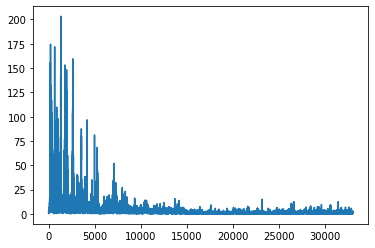

In [37]:
plt.plot(aa[0]["fdata"])

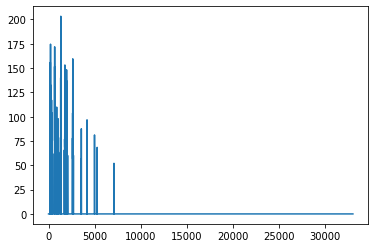

In [38]:
plt.plot(aa[0]["ffdata"])

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


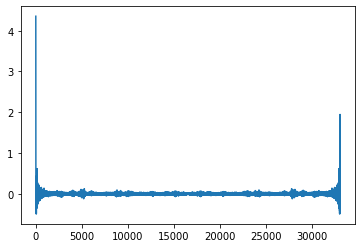

In [39]:
plt.plot(aa[0]["ifftdata"])

In [42]:
wavfile.write("c2.wav", aa[0]['new_rate'],data)

In [43]:
freq, sound = wavfile.read("2samp.wav")
aa = resample_summary(sound, freq)
if len(aa) == 1:
    data = aa[0]["data"]
else:
    a = np.asarray(aa[0]["data"])
    b = np.asarray(aa[1]["data"])
    data = np.stack((a,b), axis = 1)
    data = np.asarray(data)
    
data

channel
fft
filter
ny
459155
ifft
resamp
459155


array([[ 1.06869057e-12,  4.71481133e-13],
       [ 3.86614247e+01, -5.62490390e+00],
       [ 6.69095982e+01, -9.29419129e+00],
       ...,
       [-1.69734540e+02,  3.05745571e+01],
       [-1.05594515e+02,  1.79486876e+01],
       [-4.84688047e+01,  7.79924848e+00]])

In [ ]:
wavfile.write("22.wav", aa[0]['new_rate'],data)